In [1]:
import os
import psycopg2

import pandas as pd

In [2]:
!pwd

/Users/renan/Projects/olist-csv2postgres-etl/notebooks


In [3]:
os.listdir("../raw_data")

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_reviews_dataset_v7.csv',
 'olist_order_reviews_dataset_v6.csv',
 'olist_order_items_dataset.csv',
 'olist_order_reviews_dataset_v2.csv',
 'olist_order_reviews_dataset_v3.csv',
 'order_reviews_v2.csv',
 'order_reviews_v4.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [4]:
file_name_list = os.listdir(os.path.join(os.getcwd(), "../raw_data"))
file_name_list

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_reviews_dataset_v7.csv',
 'olist_order_reviews_dataset_v6.csv',
 'olist_order_items_dataset.csv',
 'olist_order_reviews_dataset_v2.csv',
 'olist_order_reviews_dataset_v3.csv',
 'order_reviews_v2.csv',
 'order_reviews_v4.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

In [5]:
tables = [
    "customers",
    "geolocation",
    "orders",
    "products",
    "sellers",
    "order_items",
    "order_payments",
    "order_reviews"
]

file_names = [
    "olist_customers_dataset.csv",
    "olist_geolocation_dataset.csv",
    "olist_orders_dataset.csv",
    "olist_products_dataset.csv",
    "olist_sellers_dataset.csv",
    "olist_order_items_dataset.csv",
    "olist_order_payments_dataset.csv",
    "olist_order_reviews_dataset.csv",
    
]

In [6]:
tables_files_dict = {}
for k, v in zip(tables, file_names):
    tables_files_dict[k] = v
    
tables_files_dict

{'customers': 'olist_customers_dataset.csv',
 'geolocation': 'olist_geolocation_dataset.csv',
 'orders': 'olist_orders_dataset.csv',
 'products': 'olist_products_dataset.csv',
 'sellers': 'olist_sellers_dataset.csv',
 'order_items': 'olist_order_items_dataset.csv',
 'order_payments': 'olist_order_payments_dataset.csv',
 'order_reviews': 'olist_order_reviews_dataset.csv'}

In [7]:
for file_name in file_name_list:
    if file_name.startswith("olist_"):
        print(file_name)

olist_sellers_dataset.csv
olist_orders_dataset.csv
olist_order_reviews_dataset_v7.csv
olist_order_reviews_dataset_v6.csv
olist_order_items_dataset.csv
olist_order_reviews_dataset_v2.csv
olist_order_reviews_dataset_v3.csv
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv


In [8]:
data = {}
for k, v in zip(tables, file_names):
    data[k] = pd.read_csv(f"../raw_data/{v}")
    
data.keys()

dict_keys(['customers', 'geolocation', 'orders', 'products', 'sellers', 'order_items', 'order_payments', 'order_reviews'])

In [9]:
data['sellers']['seller_city'][(data['sellers']['seller_city'].str.contains(","))]

Series([], Name: seller_city, dtype: object)

In [10]:
for dataset, file in data.items():
    print(dataset)
    print(data[dataset].columns)
    print('\n')

customers
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


geolocation
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


orders
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


products
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


sellers
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


order_items
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_

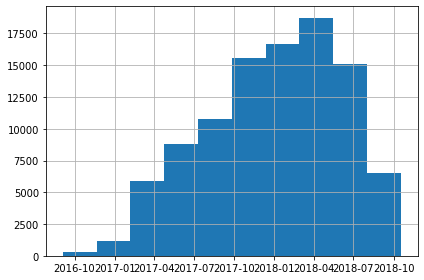

In [11]:
import matplotlib.pyplot as plt
pd.to_datetime(data['orders']['order_purchase_timestamp']).dt.date.hist()
plt.tight_layout()

In [ ]:
# data['order_reviews']['review_comment_message'] = data['order_reviews']['review_comment_message'].str.replace('\n', '')

In [ ]:
def str_to_raw(string_:str):
    return fr"{string_}"

In [17]:
data['order_reviews'] = data['order_reviews'].drop(columns=['review_comment_title', 'review_comment_message'])

In [30]:
data['order_reviews']  = data['order_reviews'].drop_duplicates(subset='review_id')

In [ ]:
data['order_reviews']['review_comment_message'] = data['order_reviews']['review_comment_message'].str.encode('unicode_escape').str.decode('utf-8')

In [ ]:
data['order_reviews']['review_comment_message'] = data['order_reviews']['review_comment_message'].str.replace(",", ";")

In [31]:
data['order_reviews'].to_csv('../raw_data/olist_order_reviews_dataset_vShort.csv', index=False, )

In [ ]:
weird_literal = 'þ'
weird_name = '\N{LATIN SMALL LETTER THORN}'
weird_char = '\xfe'  # hex representation
weird_literal == weird_name == weird_char  # True

In [ ]:
new_data = [[data['order_reviews']['review_comment_message'].replace('\n', weird_char) + weird_char, sample[1]]
              for sample in data]

In [35]:
(data['customers'].duplicated(subset='customer_id')).sum()

0